In [1]:
#importing the libraries
import pandas as pd
df=pd.read_csv('Mall_Customers.csv')

In [2]:
#Loading the dataset
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
#Finding information of the data with data types, columns and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
#Dropping the columns 
df.drop(['CustomerID','Gender','Age'], axis='columns',inplace= True)

In [5]:
#Printing first 10 rows of the dataset
df.head(10)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


Text(0, 0.5, 'Spending Score (1-100)')

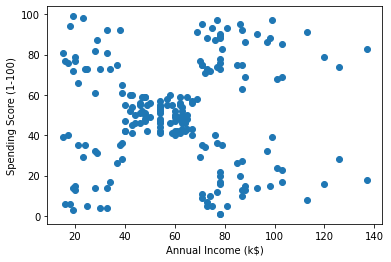

In [6]:
#Scatter plot
from matplotlib import pyplot as plt
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [7]:
#We use scaling
#Preprocessing using minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)']= scaler.transform(df[['Annual Income (k$)']])
scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)']= scaler.transform(df[['Spending Score (1-100)']])
df.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


Text(0, 0.5, 'Spending Score (1-100)')

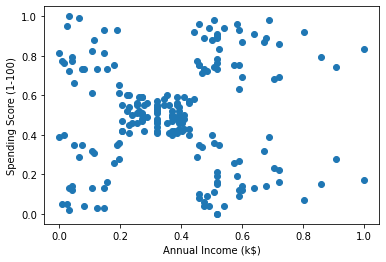

In [8]:
#Scatter plot after scaling the data
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

In [9]:
#Creating a copy of dataframe
X=df.copy()

In [10]:
#Displaying X
X

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959
...,...,...
195,0.860656,0.795918
196,0.909836,0.275510
197,0.909836,0.744898
198,1.000000,0.173469


In [11]:
#KMeans model building
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)
y = kmeans.fit_predict(X)
y

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [12]:
df['cluster']=y
df.head(15)

,Annual Income (k$),Spending Score (1-100),cluster
0,0.000000,0.387755,0
1,0.000000,0.816327,4
2,0.008197,0.051020,0
3,0.008197,0.775510,4
4,0.016393,0.397959,0
5,0.016393,0.765306,4
6,0.024590,0.051020,0
7,0.024590,0.948980,4
8,0.032787,0.020408,0
9,0.032787,0.724490,4


In [13]:
#To check the cluster centers
kmeans.cluster_centers_

array([[0.09265859, 0.20319432],
       [0.58638083, 0.82783883],
       [0.33029751, 0.49508692],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894]])

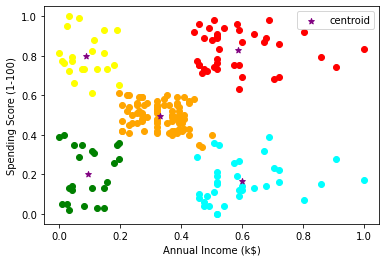

In [14]:
#Visualizing all the clusters 
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='orange')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='cyan')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='yellow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

In [15]:
#Elbow plot
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


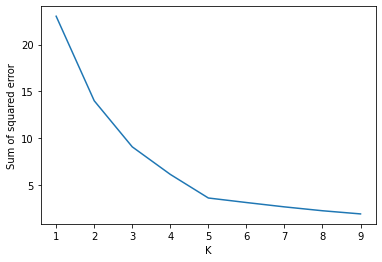

In [16]:
#Visualizing the Elbow plot to get the optimal value of K 
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
""" 
##Model Interpretation   

Cluster 1 (Green Color) - Earning less , spending less
Cluster 2 (Red Color) - Earning high and also spending high [TARGET SET]
Cluster 3 (Orange Color) - Average in terms of earning and spending 
Cluster 4 (Cyan Color) - Earning high but spending less
Cluster 5 (Yellow Color) - Earning less but spending more

"""